# ARMA Models in `statsmodels` - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using statsmodels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

In [2]:
# Preview the dataset
data

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6
1924-01-01,47.6
1928-01-01,47.8
1932-01-01,46.2
1936-01-01,46.5


Plot this time series data. 

<AxesSubplot:xlabel='year'>

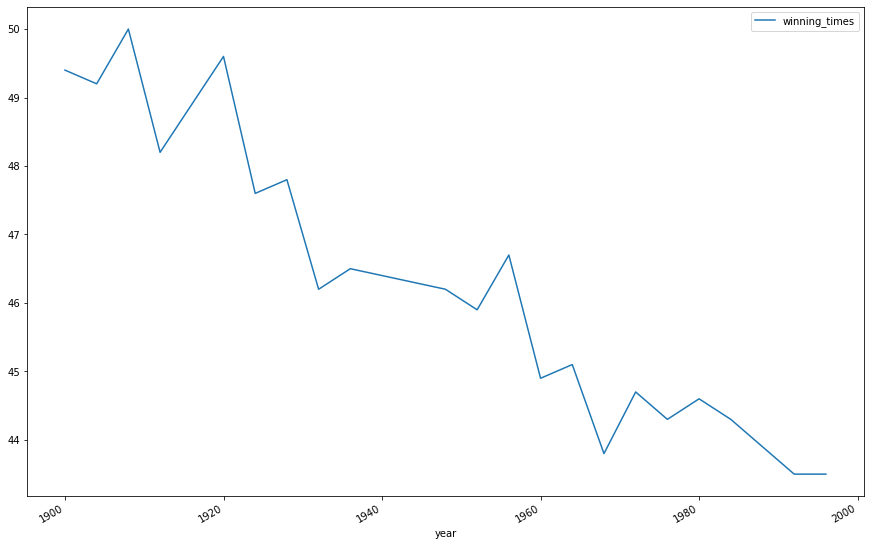

In [3]:
# Plot the time series
data.plot(figsize=(15,10))

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0
1928-01-01,0.2
1932-01-01,-1.6
1936-01-01,0.3
1948-01-01,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

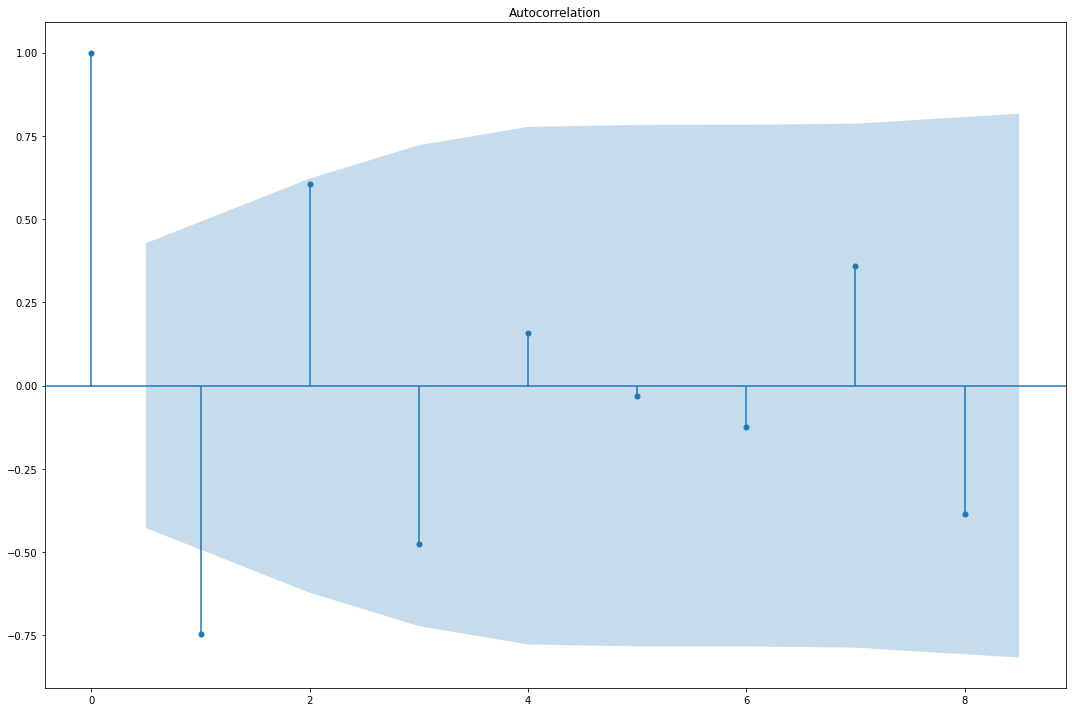

In [5]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(15,10))
plot_acf(data_diff, ax=ax, lags=8)
fig.tight_layout()
plt.show()

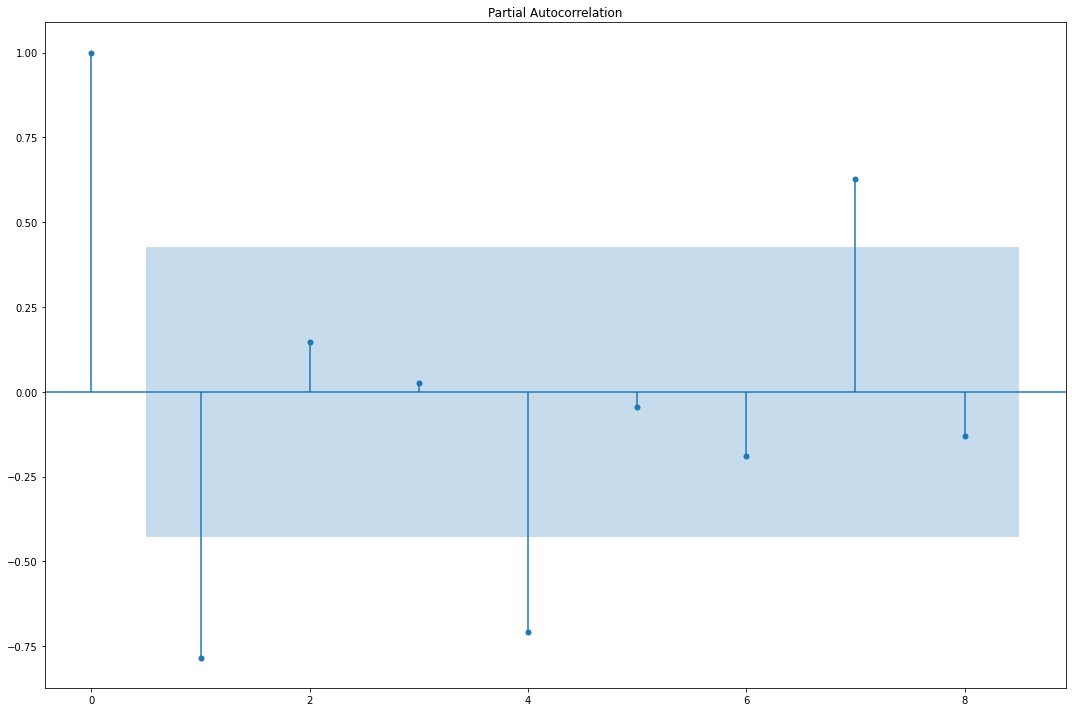

In [6]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(15,10))
plot_pacf(data_diff, ax=ax, lags=8)
fig.tight_layout()
plt.show()

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [7]:
from statsmodels.tsa.arima_model import ARMA

# ARMA(1,0)
arma_model = ARMA(data_diff, order=(1,0)).fit()
arma_model.summary()

/Users/stevencontreras/.pyenv/versions/anaconda3-2020.02/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Wed, 02 Sep 2020   AIC                             46.107
Time:                        10:05:38   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3916           +0.0000j            1.3916            0.5000
-----------------------------------------------------------------------------
"""

In [8]:
# this is a good model since p-values indicate params are significant
# so whether we should choose this or not depends on how we evaluate AIC or BIC

In [9]:
# ARMA(0,1)
arma_model = ARMA(data_diff, order=(0,1)).fit()
arma_model.summary()

/Users/stevencontreras/.pyenv/versions/anaconda3-2020.02/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/stevencontreras/.pyenv/versions/anaconda3-2020.02/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/stevencontreras/.pyenv/versions/anaconda3-2020.02/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(0, 1)   Log Likelihood                 -22.654
Method:                       css-mle   S.D. of innovations              0.661
Date:                Wed, 02 Sep 2020   AIC                             51.308
Time:                        10:05:38   BIC                             54.442
Sample:                             0   HQIC                            51.988
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3108      0.022    -13.990      0.000      -0.354      -0.267
ma.L1.winning_times    -1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [10]:
# this is not a good model since nan is reported for a parameter

In [11]:
# ARMA(1,1)
arma_model = ARMA(data_diff, order=(1,1)).fit()
arma_model.summary()

/Users/stevencontreras/.pyenv/versions/anaconda3-2020.02/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Wed, 02 Sep 2020   AIC                             47.916
Time:                        10:05:38   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.001      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_times     0.1172      0.254      0.462      0.644      -0.380       0.614
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2974           +0.0000j            1.2974            0.5000
MA.1           -8.5305           +0.0000j            8.5305            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
# this is not a good model since an MA parameter is not significant

## What is your final model? Why did you pick this model?

In [13]:
# Your comments here

# so, in this case, we would select the ARMA(1,0) model from the above options
# (see explanations following each model)

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 